## Import all the needed Libaries

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import random
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [17]:
df = pd.read_csv(r"C:\Users\USER\Downloads\student_data.csv")
df.head(10)

,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,submitted,accepted,Meknes,true,accepted,uk_ai_team,accepted,Paid,Cybersecurity
1,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,submitted,accepted,Bamenda,true,accepted,fr_ai_team,accepted,Paid,Artificial Intelligence
2,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,submitted,accepted,Suez,true,accepted,uk_ai_team,accepted,Paid,Software Development
3,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,submitted,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,Paid,Database Administration
4,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,submitted,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,Paid,Machine Learning
5,NaN,Botswana,True,favouraugustine163@outlook.com,5,akpanjohnbull1@icloud.com,Akpan John,paid,submitted,accepted,Misrata,true,accepted,uk_ai_team,accepted,Paid,Web Development
6,same kids email and videos saved ( 08/24/2023)...,Burundi,True,ochukoedewor57@gmail.com,5,edeworagofere@gmail.com,Edewor Agofere,Paid,submitted,accepted,Blida,true,accepted,us_ai_team,accepted,Paid,Software Development
7,NaN,Angola,True,bayosabo6@yahoo.com,5,nkemjikadavid33@hotmail.com,Miracle chiwendu,PAID VIA TC,submitted,accepted,Musanze,true,accepted,ch_ai_team,accepted,Paid,Cybersecurity
8,Asked to join the call(08/15),Angola,True,iniobongprincessakan@outlook.com,5,akanokonsamson@hotmail.com,Akan Okon Samson,Paid,submitted,accepted,Gitega,true,accepted,uk_ai_team,accepted,Paid,Cybersecurity
9,NaN,Tunisia,True,kalifatnurudeen@hotmail.com,7,feliciatobechukwu@icloud.com,Felicia Tobechukwu,7/13/2021,submitted,accepted,Machakos,true,accepted,fr_ai_team,accepted,Paid,Cybersecurity


## Understand, Explore and Clean the Data

In [7]:
df.isna().sum()   #check the columns with missing values

ttl_remark_before_testing    630
country                        0
likely_to_paid                 2
student_email                  2
expected_pay_usd               0
parent_email                   2
parent_name                    2
payment_remarks              413
id_submission_status           2
survey_status                  2
region                         0
signed_nda                     2
nda_status                     2
ttl_team_assigned              0
id_status                      2
final_payment_status           2
preferred_IT_field             0
dtype: int64

In [85]:
# view all the entries in the 'comments' to know what to do with the missing values
df['comments'] #clearly the rows with comment didnt meet the requirement for the test

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
1032                                       No ID uploaded
1033                            Need to sign the new NDA.
1034    Need to have correct different parent name + sign
1035                                    Need to join call
1036                                    Need to join call
Name: comments, Length: 1037, dtype: object

In [11]:
# view all the entries in the 'isPayed' to know what to do with the missing values
#df['likely_to_paid'].unique()
#df = df[df['likely_to_paid'].isna()]
#df
df.dropna(subset=['likely_to_paid'], inplace=True) # all na in the 'isPayed'  has been droped from the dataset

In [12]:
df.isna().sum()

ttl_remark_before_testing    630
country                        0
likely_to_paid                 0
student_email                  0
expected_pay_usd               0
parent_email                   0
parent_name                    0
payment_remarks              411
id_submission_status           0
survey_status                  0
region                         0
signed_nda                     0
nda_status                     0
ttl_team_assigned              0
id_status                      0
final_payment_status           0
preferred_IT_field             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 1034
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ttl_remark_before_testing  405 non-null    object
 1   country                    1035 non-null   object
 2   likely_to_paid             1035 non-null   object
 3   student_email              1035 non-null   object
 4   expected_pay_usd           1035 non-null   int64 
 5   parent_email               1035 non-null   object
 6   parent_name                1035 non-null   object
 7   payment_remarks            624 non-null    object
 8   id_submission_status       1035 non-null   object
 9   survey_status              1035 non-null   object
 10  region                     1035 non-null   object
 11  signed_nda                 1035 non-null   object
 12  nda_status                 1035 non-null   object
 13  ttl_team_assigned          1035 non-null   object
 14  id_status    

In [14]:
df.columns

Index(['ttl_remark_before_testing', 'country', 'likely_to_paid',
       'student_email', 'expected_pay_usd', 'parent_email', 'parent_name',
       'payment_remarks', 'id_submission_status', 'survey_status', 'region',
       'signed_nda', 'nda_status', 'ttl_team_assigned', 'id_status',
       'final_payment_status', 'preferred_IT_field'],
      dtype='object')

In [15]:
df.dtypes

ttl_remark_before_testing    object
country                      object
likely_to_paid               object
student_email                object
expected_pay_usd              int64
parent_email                 object
parent_name                  object
payment_remarks              object
id_submission_status         object
survey_status                object
region                       object
signed_nda                   object
nda_status                   object
ttl_team_assigned            object
id_status                    object
final_payment_status         object
preferred_IT_field           object
dtype: object

In [16]:
df.describe()

,expected_pay_usd
count,1035.000000
mean,9.194203
std,3.712330
min,5.000000
25%,7.000000
50%,10.000000
75%,10.000000
max,15.000000


## Exploratory Data Analysis will help us gain insights into the DATA

#### Identify which IT fields are most popular among participants  ===> Web Development

In [18]:
Popular_fields = df['preferred_IT_field'].value_counts(
    ascending=False).reset_index()
Popular_fields.rename(columns={
    'count': 'total_count'}, inplace=True)
Popular_fields

,preferred_IT_field,total_count
0,Web Development,117
1,Artificial Intelligence,112
2,Cybersecurity,110
3,Software Development,107
4,Data Science,105
5,Cloud Computing,104
6,DevOps,103
7,Networking,96
8,Database Administration,94
9,Machine Learning,89


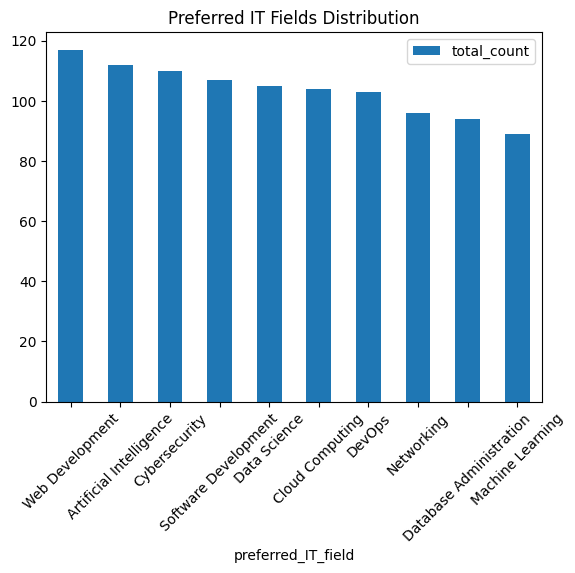

In [19]:
# Use a bar chat to show the result
Popular_fields.plot(kind='bar',x ='preferred_IT_field',
                    y ='total_count',
                    title='Preferred IT Fields Distribution')
plt.xticks(rotation=45);

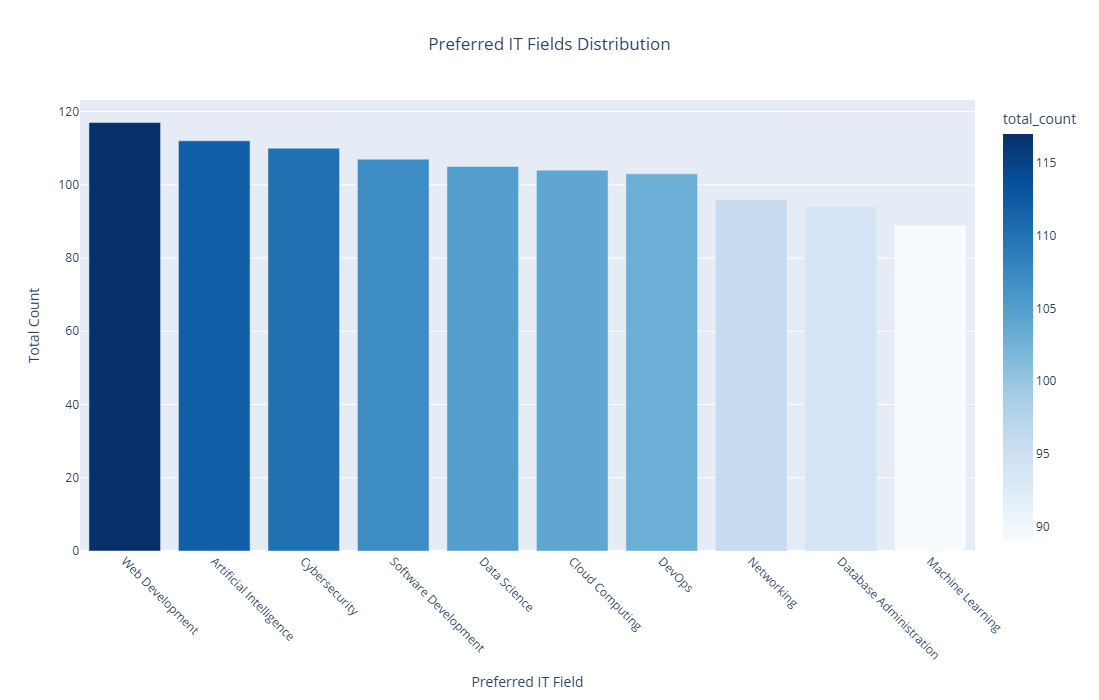

In [35]:
# Use interractive plot to also show the result
interactive_plot = px.bar(Popular_fields,x='preferred_IT_field'
                          ,y='total_count',
                          color='total_count',
                          color_continuous_scale='Blues',
                          title='Preferred IT Fields Distribution')
interactive_plot.update_layout(
    width = 700,
    height = 700,
    xaxis_title='Preferred IT Field',
    yaxis_title='Total Count',
    xaxis_tickangle=45,
    title_x=0.5)
interactive_plot.show()

#### Determine if certain regions have a preference for specific IT fields

In [20]:
grouped_data = df.groupby(['region', 
                           'preferred_IT_field']).size().reset_index(name='count')
grouped_data
IT_25_region = grouped_data.sort_values(by='count',
                                         ascending=False).head(25)
IT_25_region

,region,preferred_IT_field,count
56,Ashanti,Cybersecurity,4
740,Tetouan,Data Science,4
619,Oromia,Database Administration,4
73,Batna,Software Development,4
19,Ajdabiya,Cybersecurity,3
767,Tunis,DevOps,3
709,Solwezi,Networking,3
752,Tigray,Cloud Computing,3
452,Luxor,DevOps,3
563,Nairobi,Database Administration,3


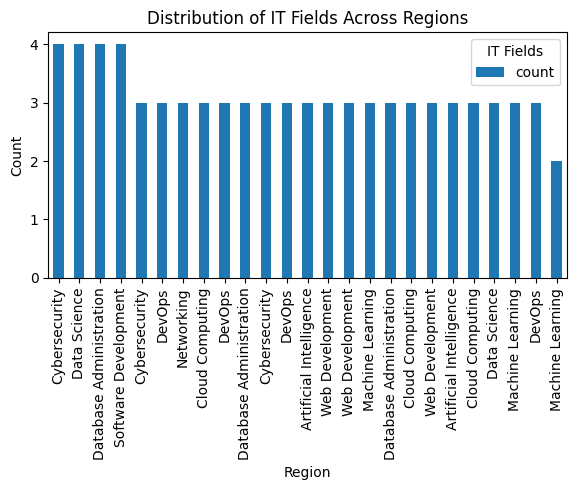

In [25]:
# Use a bar chat to show the result
IT_25_region.plot(kind='bar', x = 'preferred_IT_field',
                  figsize=(6, 5), stacked=True)
plt.title('Distribution of IT Fields Across Regions')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='IT Fields'),
plt.tight_layout()
plt.show()

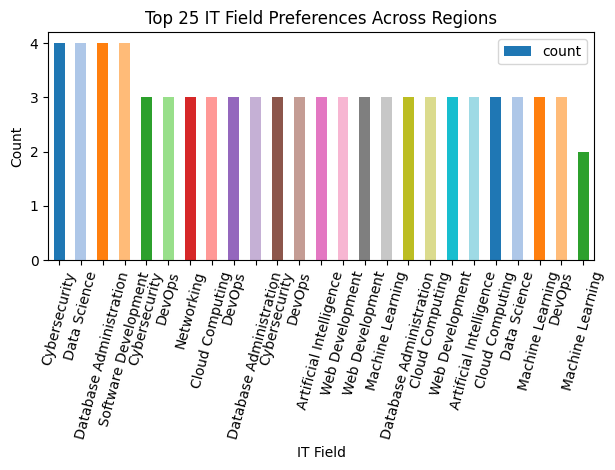

In [29]:
IT_25_region.plot(kind='bar', x='preferred_IT_field', y='count',
                  color=plt.cm.tab20.colors,
                  title='Top 25 IT Field Preferences Across Regions')
plt.xlabel('IT Field')
plt.ylabel('Count')
plt.xticks(rotation=75)  
plt.tight_layout()  
plt.show()

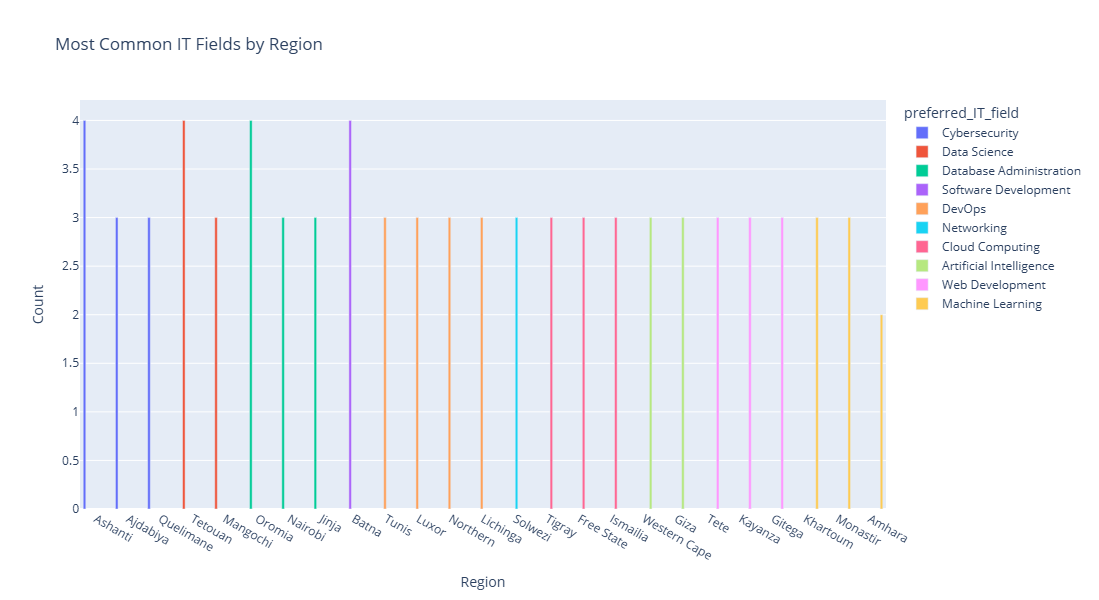

In [28]:
# Create grouped bar chart using plotly for the result
fig = px.bar(IT_25_region, x='region', y='count',
             color='preferred_IT_field',
             title='Most Common IT Fields by Region', 
             labels={'count': 'Count', 'region': 'Region'},
             barmode='group', height=600, width =900)
fig.show()

#### Analyze payment expectations geographically

In [31]:
# use the groupby function to get the average expected pay per country
avg_payment_country = df.groupby('country'
                                )['expected_pay_usd'].mean().reset_index()
avg_payment_country = avg_payment_country.sort_values(by='expected_pay_usd',
                                                     ascending=False)
avg_payment_country

,country,expected_pay_usd
10,Libya,10.260870
5,Egypt,10.150000
17,Senegal,10.023810
12,Morocco,9.757576
11,Malawi,9.702703
21,Tunisia,9.666667
6,Ethiopia,9.594595
8,Ivory Coast,9.581395
4,Cameroon,9.522727
24,Zimbabwe,9.511628


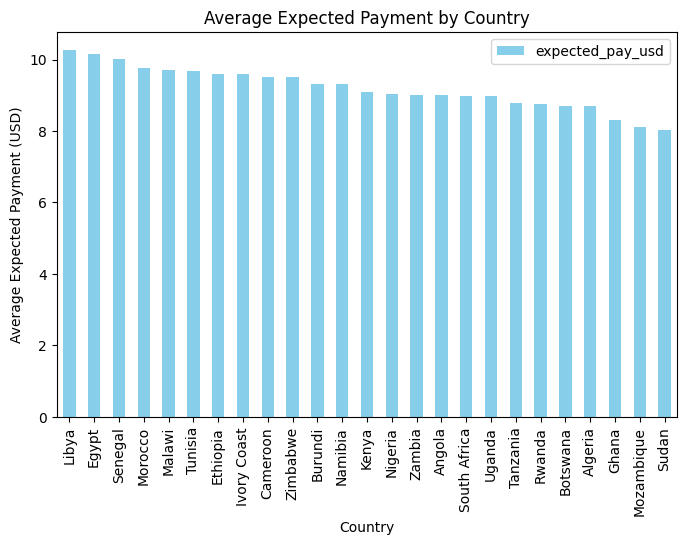

In [32]:
# use a bar chat to show the result
avg_payment_country.plot(kind='bar',
                         x='country', color='skyblue',
                         figsize=(8, 5))
plt.title('Average Expected Payment by Country')
plt.xlabel('Country')
plt.ylabel('Average Expected Payment (USD)')
plt.show()

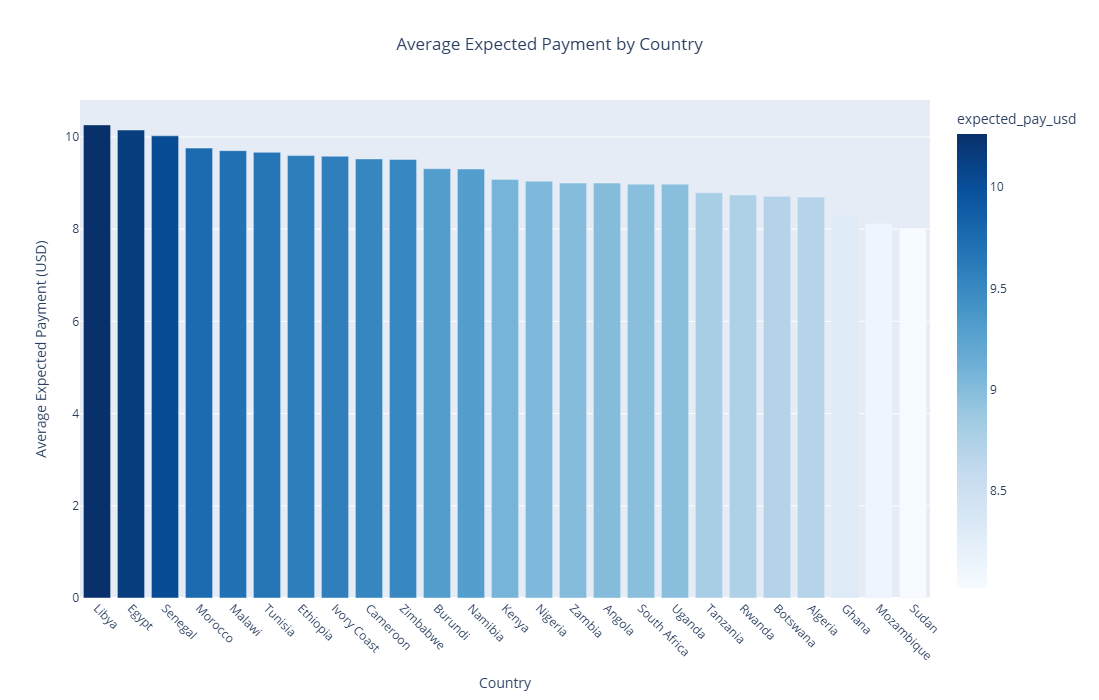

In [36]:
#use interactive plot
fig = px.bar(avg_payment_country,x='country',
             y = 'expected_pay_usd',
    title='Average Expected Payment by Country',
    labels=('Country', 'Average Expected Payment (USD)'),
    color='expected_pay_usd',
    color_continuous_scale='Blues')
fig.update_layout(
    width = 700,
    height = 700,
    xaxis_title='Country',
    yaxis_title='Average Expected Payment (USD)',
    xaxis_tickangle=45,  
    title_x=0.5)
fig.show()

#### Analyze payment expectations by IT field

In [39]:
avg_payment_field = df.groupby('preferred_IT_field'
                              )['expected_pay_usd'].mean().reset_index()
avg_payment_field = avg_payment_field.sort_values(by='expected_pay_usd',
                                                  ascending=False)
avg_payment_field

,preferred_IT_field,expected_pay_usd
6,Machine Learning,10.033708
5,DevOps,9.466019
4,Database Administration,9.244681
1,Cloud Computing,9.192308
7,Networking,9.177083
3,Data Science,9.152381
9,Web Development,9.136752
8,Software Development,9.112150
2,Cybersecurity,9.018182
0,Artificial Intelligence,8.633929


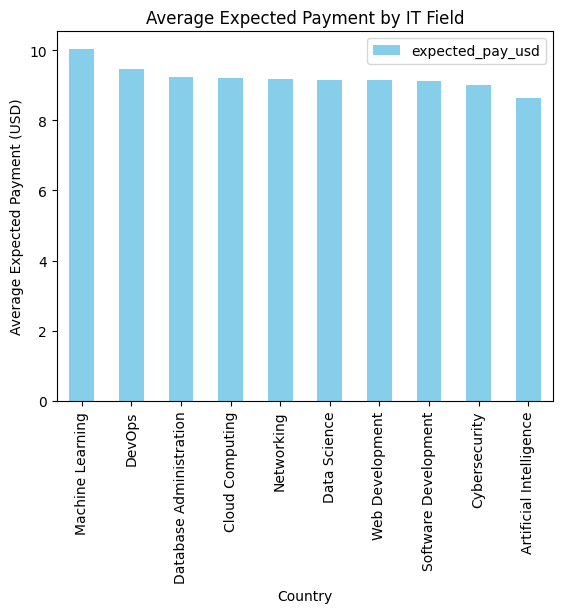

In [40]:
avg_payment_field.plot(kind='bar',x='preferred_IT_field',
                       color='skyblue')
plt.title('Average Expected Payment by IT Field')
plt.xlabel('Country')
plt.ylabel('Average Expected Payment (USD)')
plt.show()

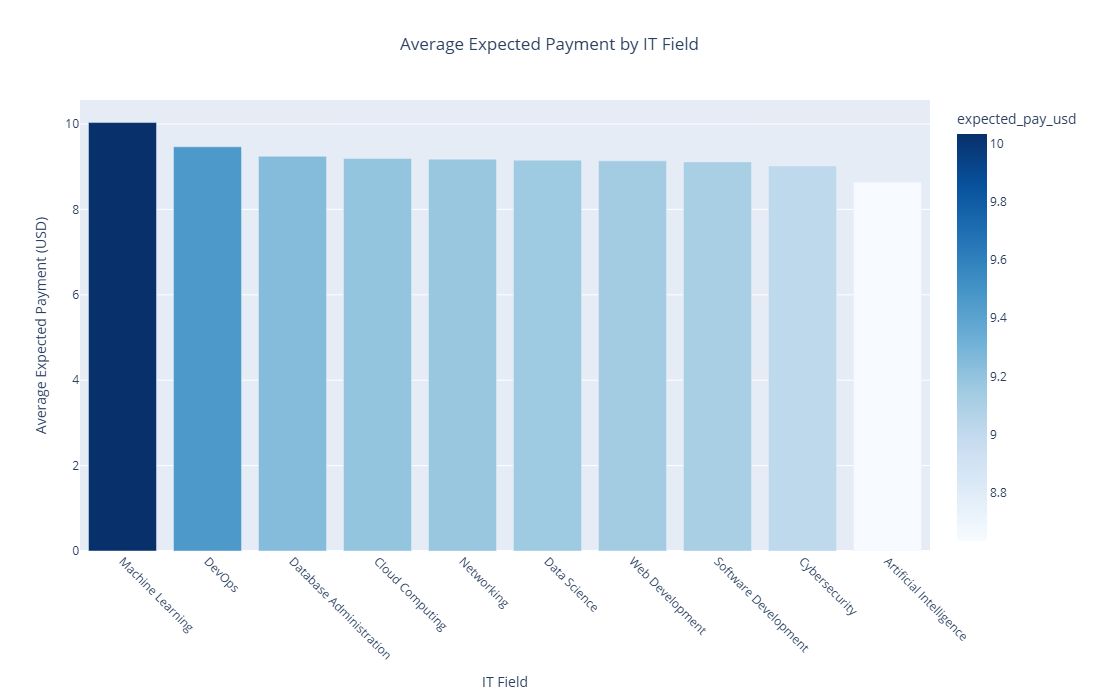

In [41]:
# plot interractive plot
fig = px.bar(avg_payment_field,x='preferred_IT_field',
             y = 'expected_pay_usd',
    title='Average Expected Payment by IT Field',
    labels=('preferred_IT_field', 
            'Average Expected Payment (USD)'),
    color='expected_pay_usd',
    color_continuous_scale='Blues')
fig.update_layout(
    width = 700,
    height = 700,
    xaxis_title='IT Field',
    yaxis_title='Average Expected Payment (USD)',
    xaxis_tickangle=45,  
    title_x=0.5)
fig.show()

#### What percentage of participants have their ID verified?

In [44]:
id_verified = df['id_status'].value_counts().reset_index()
id_verified

,id_status,count
0,accepted,771
1,info_requested,140
2,pending,76
3,rejected,47
4,false,1


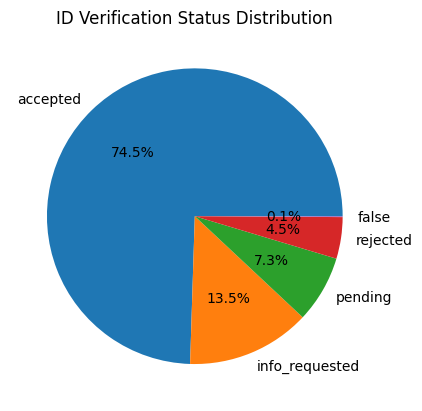

In [43]:
figsize=((15, 8)),
plt.pie(id_verified,labels=id_verified.index, 
        autopct='%1.1f%%')
plt.title('ID Verification Status Distribution')
plt.show()

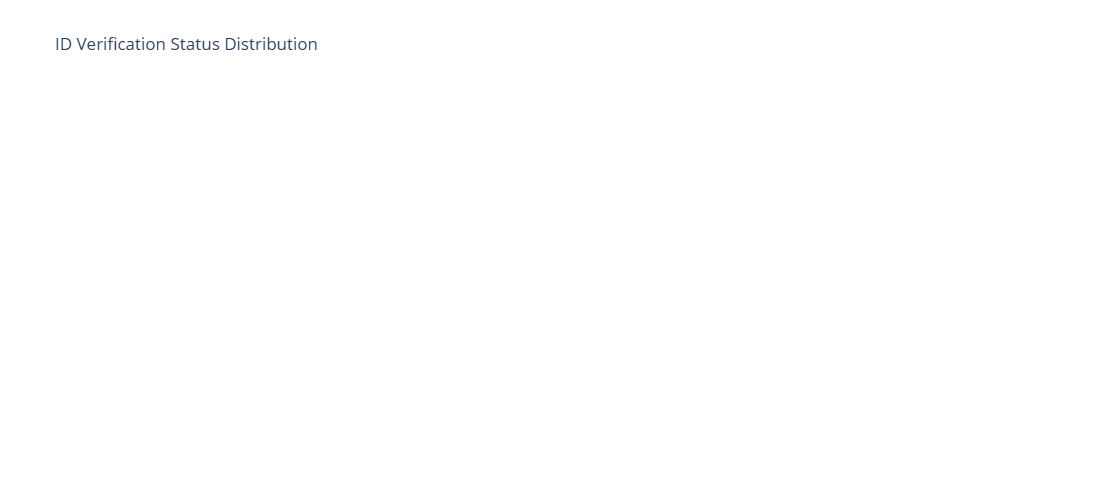

In [46]:
# use interractive plot
fig = go.Figure(data=[go.Pie(
    labels=id_verified.index,
    values=id_verified.values,
    textinfo='percent+label',  
    hoverinfo='label+percent',
    marker=dict(colors=['skyblue', 'lightgreen', 
                        'salmon', 'gold']))])
fig.update_layout(
    width = 700,
    height = 500,
    title='ID Verification Status Distribution')
fig.show()

#### Assess trends in payment status (final_payment_status) based on other attributes
#### preferred_IT_field

In [47]:
payment_status_by_field = df.groupby(['preferred_IT_field', 'final_payment_status']).size().unstack()
payment_status_by_field.reset_index()

final_payment_status,preferred_IT_field,Paid,Unpaid
0,Artificial Intelligence,64,48
1,Cloud Computing,66,38
2,Cybersecurity,75,35
3,Data Science,64,41
4,Database Administration,59,35
5,DevOps,64,39
6,Machine Learning,52,37
7,Networking,49,45
8,Software Development,62,45
9,Web Development,70,47


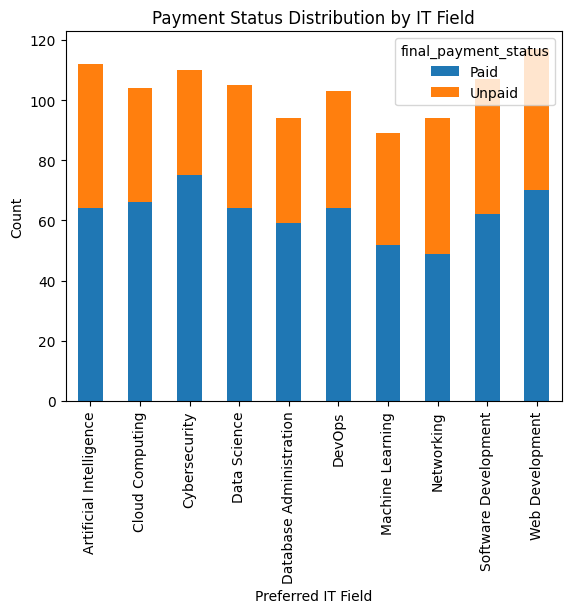

In [162]:
payment_status_by_field.plot(kind='bar', stacked=True)
plt.title('Payment Status Distribution by IT Field')
plt.xlabel('Preferred IT Field')
plt.ylabel('Count')
plt.show()

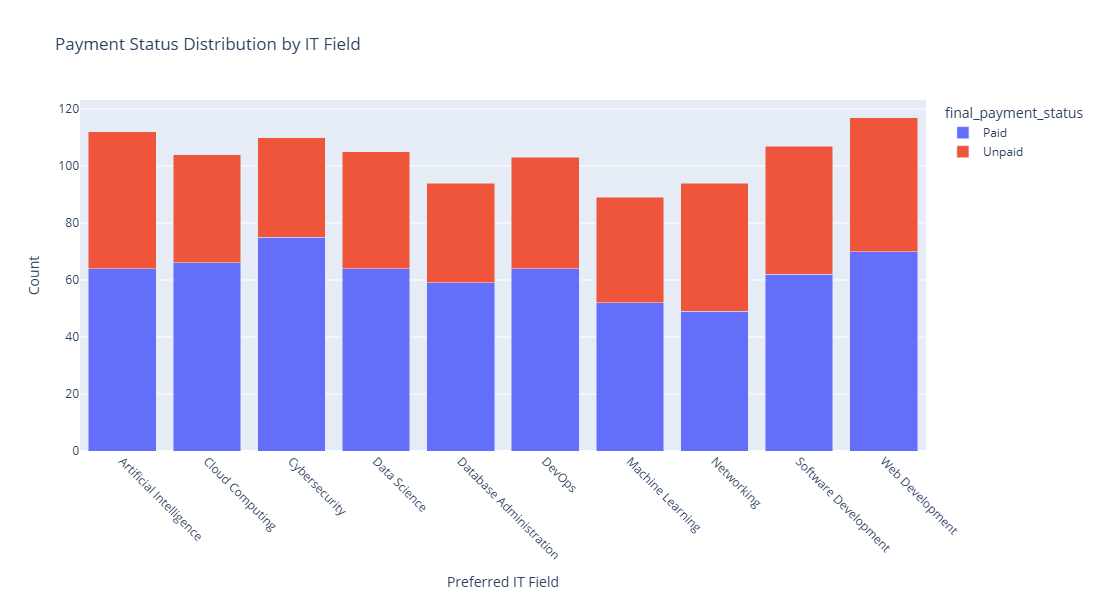

In [48]:
# use interractive plot
fig = px.bar(
    payment_status_by_field,
    title='Payment Status Distribution by IT Field',
    labels={'preferred_IT_field': 'Preferred IT Field', 
            'Count': 'Count', 
            'Payment Status': 'Payment Status'},
    barmode='stack')
fig.update_layout(
    width = 700,
    height = 600,
    xaxis_title="Preferred IT Field",
    yaxis_title="Count",
    xaxis_tickangle=45)
fig.show()

In [170]:
df.head()

,test_id,ttl_remake_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,submitted,accepted,Meknes,true,accepted,uk_ai_team,accepted,Paid,Cybersecurity
1,64aaccb708f8f4c913e68c21,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,submitted,accepted,Bamenda,true,accepted,fr_ai_team,accepted,Paid,Artificial Intelligence
2,648f5c57b102165fdb09af40,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,submitted,accepted,Suez,true,accepted,uk_ai_team,accepted,Paid,Software Development
3,64a197f993bef694be7355e9,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,submitted,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,Paid,Database Administration
4,64a3af135328da196a6f23a0,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,submitted,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,Paid,Machine Learning


#### Assess trends in payment status (final_payment_status) based on other attributes
#### country

In [50]:
payment_status_by_country = df.groupby(['country', 
                                        'final_payment_status']).size().unstack()
payment_status_by_country.reset_index().sort_values(by=['Paid',
                                                        'Unpaid'],
                                                    ascending=False)

payment_status_by_country = payment_status_by_country.reset_index().sort_values(by=['Paid',
                                                        'Unpaid'],
                                                    ascending=False)
payment_status_by_country

final_payment_status,country,Paid,Unpaid
15,Nigeria,36,16
9,Kenya,35,16
19,Sudan,31,12
24,Zimbabwe,31,12
3,Burundi,30,15
23,Zambia,29,21
7,Ghana,28,22
10,Libya,27,19
20,Tanzania,27,11
11,Malawi,27,10


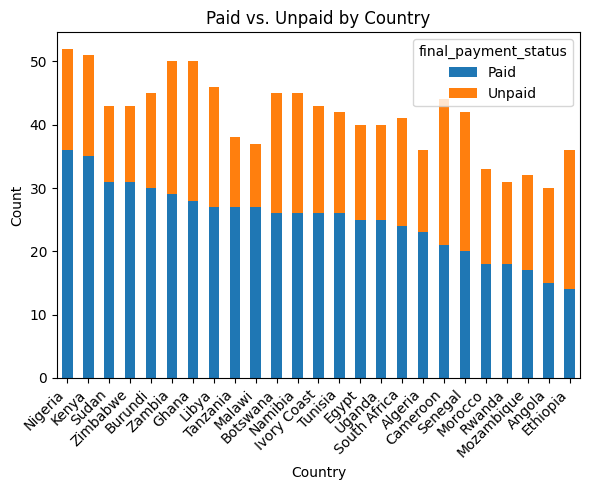

In [53]:
payment_status_by_country.set_index('country').plot(kind='bar', 
                                                    stacked=True,
                                                    figsize=(6, 5))
plt.title('Paid vs. Unpaid by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

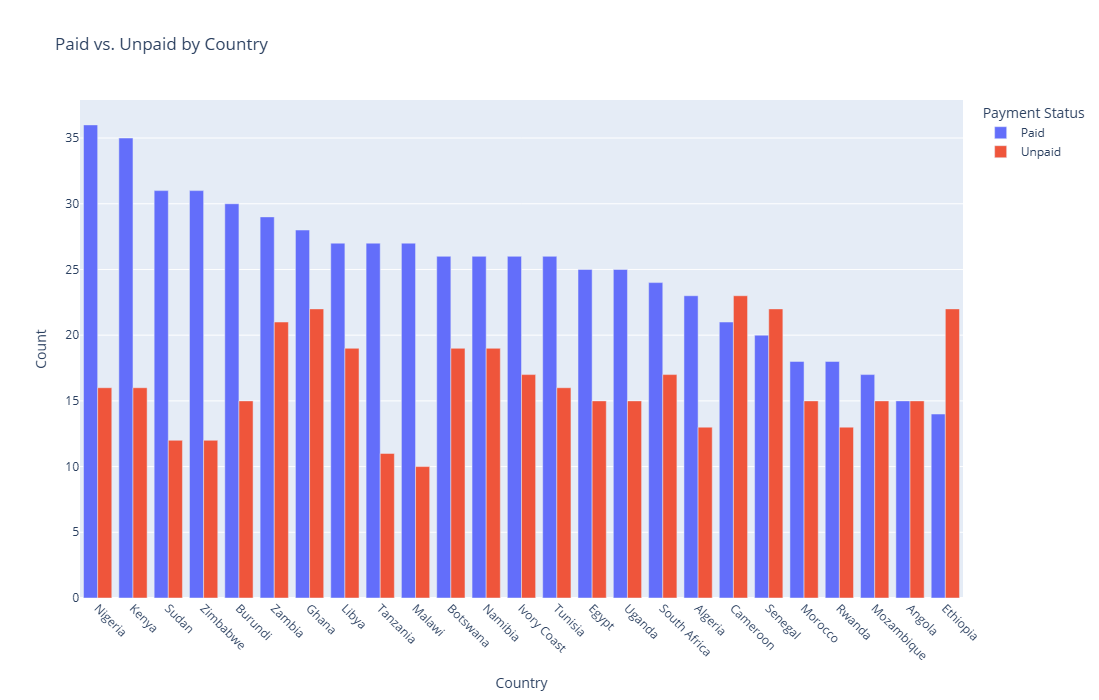

In [56]:
by_country = payment_status_by_country.melt(id_vars='country', 
                                            value_vars=['Paid', 'Unpaid'],
                                            var_name='Payment Status',
                                            value_name='Count')
fig = px.bar(
    by_country,
    x='country',
    y='Count',
    color='Payment Status',
    barmode='group',
    title='Paid vs. Unpaid by Country',
    labels={'country': 'Country', 'Count': 'Count',
            'Payment Status': 'Payment Status'},
    height=700, width = 700)
fig.update_layout(xaxis_tickangle=45)
fig.show()

#### Are students more likely to have signed NDAs in certain regions or teams?

In [57]:
nda_trends = df.groupby(['country', 'nda_status']).size().unstack()
nda_trends

nda_status,accepted,info_requested,pending,rejected,us_ai_team
country,,,,,
Algeria,32.0,2.0,2.0,NaN,NaN
Angola,27.0,3.0,NaN,NaN,NaN
Botswana,41.0,3.0,NaN,1.0,NaN
Burundi,43.0,1.0,NaN,1.0,NaN
Cameroon,40.0,2.0,NaN,2.0,NaN
Egypt,36.0,1.0,NaN,3.0,NaN
Ethiopia,31.0,1.0,1.0,3.0,NaN
Ghana,45.0,2.0,NaN,3.0,NaN
Ivory Coast,35.0,2.0,1.0,5.0,NaN


In [68]:
nda_vs_country_sorted = nda_trends.groupby(['country','accepted']).size().reset_index()
nda_vs_country_sorted

,country,accepted,0
0,Algeria,32.0,1
1,Angola,27.0,1
2,Botswana,41.0,1
3,Burundi,43.0,1
4,Cameroon,40.0,1
5,Egypt,36.0,1
6,Ethiopia,31.0,1
7,Ghana,45.0,1
8,Ivory Coast,35.0,1
9,Kenya,48.0,1


In [70]:
nda_vs_country_set =nda_vs_country_sorted.sort_values(by=['accepted', 'country'],
                                                   ascending=False)
nda_vs_country_set

,country,accepted,0
9,Kenya,48.0,1
15,Nigeria,47.0,1
23,Zambia,46.0,1
7,Ghana,45.0,1
3,Burundi,43.0,1
2,Botswana,41.0,1
19,Sudan,40.0,1
4,Cameroon,40.0,1
24,Zimbabwe,39.0,1
14,Namibia,39.0,1


In [71]:
nda_vs_country_cleaned = nda_vs_country_set.drop(columns=[0])
nda_vs_country_cleaned

,country,accepted
9,Kenya,48.0
15,Nigeria,47.0
23,Zambia,46.0
7,Ghana,45.0
3,Burundi,43.0
2,Botswana,41.0
19,Sudan,40.0
4,Cameroon,40.0
24,Zimbabwe,39.0
14,Namibia,39.0


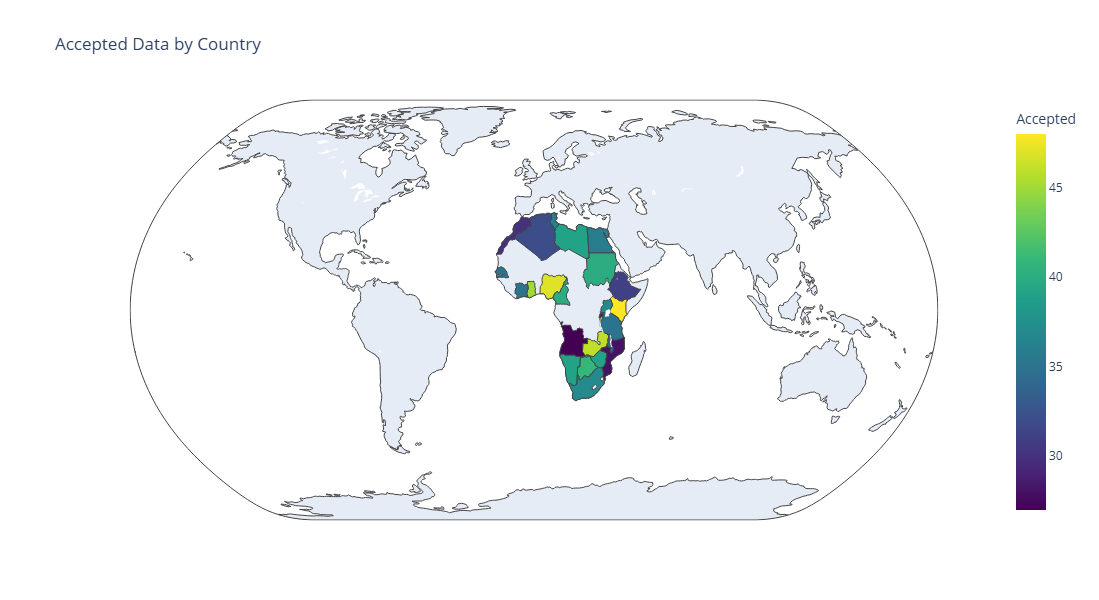

In [72]:
# use a map to show result
fig = px.choropleth(nda_vs_country_cleaned,
                    locations='country',
                    locationmode='country names',
                    color='accepted',
                    color_continuous_scale='Viridis',
                    title='Accepted Data by Country',
                    labels={'accepted': 'Accepted'},
                    projection='natural earth')
fig.update_layout(
    width=800,
    height=600)
fig.show()

In [80]:
top_10 =nda_vs_country_cleaned.nlargest(10, 'accepted')
top_10

,country,accepted
9,Kenya,48.0
15,Nigeria,47.0
23,Zambia,46.0
7,Ghana,45.0
3,Burundi,43.0
2,Botswana,41.0
19,Sudan,40.0
4,Cameroon,40.0
24,Zimbabwe,39.0
14,Namibia,39.0


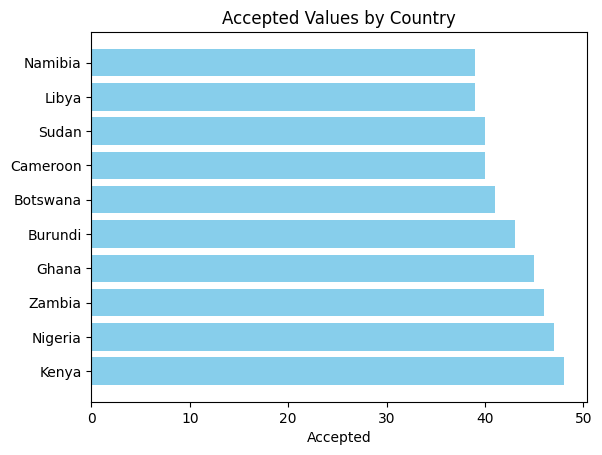

In [265]:
plt.barh(top_10['country'],top_10['accepted'], color='skyblue')
plt.xlabel('Accepted')
plt.title('Accepted Values by Country')
plt.show()

####  What is the completion rate for the survey?

In [85]:
survey_completion_rate = df['survey_status'].value_counts(normalize=True).reset_index()
survey_completion_rate[]

,survey_status,proportion
0,accepted,0.606763
1,pending,0.345894
2,rejected,0.038647
3,info_requested,0.007729
4,hpathan@applausemail.com,0.000966


In [269]:
id_payment_consistency = pd.crosstab(df['id_status'], df['final_payment_status'])
id_payment_consistency 

final_payment_status,Paid,Unpaid
id_status,,
accepted,622,149
false,1,0
info_requested,0,140
pending,1,75
rejected,1,46


## Lets Build a Machine Learning Model

In [466]:
new_df = df
new_df

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,submitted,accepted,Meknes,true,accepted,uk_ai_team,accepted,Paid,Cybersecurity
1,64aaccb708f8f4c913e68c21,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,submitted,accepted,Bamenda,true,accepted,fr_ai_team,accepted,Paid,Artificial Intelligence
2,648f5c57b102165fdb09af40,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,submitted,accepted,Suez,true,accepted,uk_ai_team,accepted,Paid,Software Development
3,64a197f993bef694be7355e9,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,submitted,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,Paid,Database Administration
4,64a3af135328da196a6f23a0,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,submitted,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,Paid,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,648f2df1b102165fdb09aec1,No ID uploaded,Senegal,False,obodof7@yahoo.com,7,petemike368@gmail.com,Paradise Hope,NaN,not_submitted,pending,Sfax,true,accepted,us_ai_team,accepted,Unpaid,Artificial Intelligence
1033,646c7cea4e4dce967bd4cead,Need to sign the new NDA.,Sudan,False,ukpabijane8@gmail.com,5,funmiladedavid@icloud.com,Nathaniel okeremeta,NaN,not_submitted,pending,Ismailia,false,info_requested,fr_ai_team,info_requested,Unpaid,Database Administration
1034,6465ee45bf6ae2b8268544a5,Need to have correct different parent name + sign,Ghana,False,gewguw445@outlook.com,10,kitom3546@hotmail.com,Kenny tom,NaN,not_submitted,pending,Kuito,false,info_requested,us_ai_team,info_requested,Unpaid,Networking
1035,64915e25b5ac88ac784e9c0c,Need to join call,Ethiopia,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,Meru,NaN,NaN,uk_ai_team,NaN,NaN,Networking


In [312]:
# Lets use the 'final_payment_status' as the Target varieble

#new_df = new_df.dropna(subset=['final_payment_status'])  # Drop rows with missing target variable

In [467]:
new_df.head()

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,submitted,accepted,Meknes,true,accepted,uk_ai_team,accepted,Paid,Cybersecurity
1,64aaccb708f8f4c913e68c21,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,submitted,accepted,Bamenda,true,accepted,fr_ai_team,accepted,Paid,Artificial Intelligence
2,648f5c57b102165fdb09af40,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,submitted,accepted,Suez,true,accepted,uk_ai_team,accepted,Paid,Software Development
3,64a197f993bef694be7355e9,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,submitted,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,Paid,Database Administration
4,64a3af135328da196a6f23a0,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,submitted,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,Paid,Machine Learning


In [405]:
new_df.head()

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,submitted,accepted,Meknes,true,accepted,uk_ai_team,accepted,Paid,Cybersecurity
1,64aaccb708f8f4c913e68c21,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,submitted,accepted,Bamenda,true,accepted,fr_ai_team,accepted,Paid,Artificial Intelligence
2,648f5c57b102165fdb09af40,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,submitted,accepted,Suez,true,accepted,uk_ai_team,accepted,Paid,Software Development
3,64a197f993bef694be7355e9,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,submitted,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,Paid,Database Administration
4,64a3af135328da196a6f23a0,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,submitted,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,Paid,Machine Learning


In [468]:
# Ensure 'final_payment_status' is a binary target variable (encoded)
new_df['final_payment_status'] = df['final_payment_status'].map({'Paid': 1, 'Unpaid': 0})
new_df.head()

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,submitted,accepted,Meknes,true,accepted,uk_ai_team,accepted,1.0,Cybersecurity
1,64aaccb708f8f4c913e68c21,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,submitted,accepted,Bamenda,true,accepted,fr_ai_team,accepted,1.0,Artificial Intelligence
2,648f5c57b102165fdb09af40,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,submitted,accepted,Suez,true,accepted,uk_ai_team,accepted,1.0,Software Development
3,64a197f993bef694be7355e9,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,submitted,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,1.0,Database Administration
4,64a3af135328da196a6f23a0,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,submitted,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,1.0,Machine Learning


In [469]:
new_df['id_submission_status'] = new_df['id_submission_status'].map({'submitted': 1, 'not_submitted': 0})

In [470]:
new_df

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,Cameroon,True,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,1.0,accepted,Meknes,true,accepted,uk_ai_team,accepted,1.0,Cybersecurity
1,64aaccb708f8f4c913e68c21,NaN,Angola,True,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,1.0,accepted,Bamenda,true,accepted,fr_ai_team,accepted,1.0,Artificial Intelligence
2,648f5c57b102165fdb09af40,NaN,Uganda,True,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,1.0,accepted,Suez,true,accepted,uk_ai_team,accepted,1.0,Software Development
3,64a197f993bef694be7355e9,NaN,Ivory Coast,True,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,1.0,accepted,Shubra El Kheima,true,accepted,fr_ai_team,accepted,1.0,Database Administration
4,64a3af135328da196a6f23a0,NaN,Tanzania,True,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,1.0,accepted,Yamoussoukro,true,accepted,uk_ai_team,accepted,1.0,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,648f2df1b102165fdb09aec1,No ID uploaded,Senegal,False,obodof7@yahoo.com,7,petemike368@gmail.com,Paradise Hope,NaN,0.0,pending,Sfax,true,accepted,us_ai_team,accepted,0.0,Artificial Intelligence
1033,646c7cea4e4dce967bd4cead,Need to sign the new NDA.,Sudan,False,ukpabijane8@gmail.com,5,funmiladedavid@icloud.com,Nathaniel okeremeta,NaN,0.0,pending,Ismailia,false,info_requested,fr_ai_team,info_requested,0.0,Database Administration
1034,6465ee45bf6ae2b8268544a5,Need to have correct different parent name + sign,Ghana,False,gewguw445@outlook.com,10,kitom3546@hotmail.com,Kenny tom,NaN,0.0,pending,Kuito,false,info_requested,us_ai_team,info_requested,0.0,Networking
1035,64915e25b5ac88ac784e9c0c,Need to join call,Ethiopia,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,Meru,NaN,NaN,uk_ai_team,NaN,NaN,Networking


In [413]:
new_df.dropna(inplace = True)
new_df

,country,likely_to_paid,expected_pay_usd,id_submission_status,survey_status,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,Cameroon,True,5,1.0,accepted,true,accepted,uk_ai_team,accepted,1.0,Cybersecurity
1,Angola,True,15,1.0,accepted,true,accepted,fr_ai_team,accepted,1.0,Artificial Intelligence
2,Uganda,True,15,1.0,accepted,true,accepted,uk_ai_team,accepted,1.0,Software Development
3,Ivory Coast,True,15,1.0,accepted,true,accepted,fr_ai_team,accepted,1.0,Database Administration
4,Tanzania,True,7,1.0,accepted,true,accepted,uk_ai_team,accepted,1.0,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...
1030,Uganda,False,7,0.0,rejected,true,rejected,fr_ai_team,rejected,0.0,Cybersecurity
1031,Botswana,False,10,0.0,pending,false,accepted,fr_ai_team,info_requested,0.0,Cybersecurity
1032,Senegal,False,7,0.0,pending,true,accepted,us_ai_team,accepted,0.0,Artificial Intelligence
1033,Sudan,False,5,0.0,pending,false,info_requested,fr_ai_team,info_requested,0.0,Database Administration


In [473]:
# Encode categorical variables using LabelEncoder for columns with string categories
label_cols = ['country', 'survey_status','likely_to_paid','signed_nda', 'nda_status',
              'ttl_team_assigned', 'id_status', 'preferred_IT_field']
le = LabelEncoder()

for col in label_cols:
    new_df[col] = le.fit_transform(new_df[col].astype(str))  

In [474]:
new_df

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,19,1,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,1.0,0,Meknes,3,0,2,0,1.0,2
1,64aaccb708f8f4c913e68c21,NaN,1,1,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,1.0,0,Bamenda,3,0,1,0,1.0,0
2,648f5c57b102165fdb09af40,NaN,15,1,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,1.0,0,Suez,3,0,2,0,1.0,8
3,64a197f993bef694be7355e9,NaN,23,1,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,1.0,0,Shubra El Kheima,3,0,1,0,1.0,4
4,64a3af135328da196a6f23a0,NaN,13,1,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,1.0,0,Yamoussoukro,3,0,2,0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,648f2df1b102165fdb09aec1,No ID uploaded,9,0,obodof7@yahoo.com,7,petemike368@gmail.com,Paradise Hope,NaN,0.0,4,Sfax,3,0,3,0,0.0,0
1033,646c7cea4e4dce967bd4cead,Need to sign the new NDA.,11,0,ukpabijane8@gmail.com,5,funmiladedavid@icloud.com,Nathaniel okeremeta,NaN,0.0,4,Ismailia,1,1,1,2,0.0,4
1034,6465ee45bf6ae2b8268544a5,Need to have correct different parent name + sign,22,0,gewguw445@outlook.com,10,kitom3546@hotmail.com,Kenny tom,NaN,0.0,4,Kuito,1,1,3,2,0.0,7
1035,64915e25b5ac88ac784e9c0c,Need to join call,21,2,NaN,15,NaN,NaN,NaN,NaN,3,Meru,2,2,2,3,NaN,7


In [475]:
new_df

,test_id,ttl_remark_before_testing,country,likely_to_paid,student_email,expected_pay_usd,parent_email,parent_name,payment_remarks,id_submission_status,survey_status,region,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,64a193bf93bef694be7355dd,NaN,19,1,helenmadueke900@yahoo.com,5,bolanleogbeakin@icloud.com,Bolanle Ogbeakin,Paid,1.0,0,Meknes,3,0,2,0,1.0,2
1,64aaccb708f8f4c913e68c21,NaN,1,1,thomaseloke@gmail.com,15,maduabuchiebuka7@yahoo.com,Ebuka Maduabuchi,Paid,1.0,0,Bamenda,3,0,1,0,1.0,0
2,648f5c57b102165fdb09af40,NaN,15,1,marvinnosaa@yahoo.com,15,zanubahmed30@icloud.com,Osasume Odion,PAID VIA TC,1.0,0,Suez,3,0,2,0,1.0,8
3,64a197f993bef694be7355e9,NaN,23,1,chinasiaonyeka@hotmail.com,15,okonatim35@outlook.com,Okon Atim,7/13/2021,1.0,0,Shubra El Kheima,3,0,1,0,1.0,4
4,64a3af135328da196a6f23a0,NaN,13,1,bernardokuje@hotmail.com,7,zephaniahobode@hotmail.com,Zephaniah obode,7/13/2021,1.0,0,Yamoussoukro,3,0,2,0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,648f2df1b102165fdb09aec1,No ID uploaded,9,0,obodof7@yahoo.com,7,petemike368@gmail.com,Paradise Hope,NaN,0.0,4,Sfax,3,0,3,0,0.0,0
1033,646c7cea4e4dce967bd4cead,Need to sign the new NDA.,11,0,ukpabijane8@gmail.com,5,funmiladedavid@icloud.com,Nathaniel okeremeta,NaN,0.0,4,Ismailia,1,1,1,2,0.0,4
1034,6465ee45bf6ae2b8268544a5,Need to have correct different parent name + sign,22,0,gewguw445@outlook.com,10,kitom3546@hotmail.com,Kenny tom,NaN,0.0,4,Kuito,1,1,3,2,0.0,7
1035,64915e25b5ac88ac784e9c0c,Need to join call,21,2,NaN,15,NaN,NaN,NaN,NaN,3,Meru,2,2,2,3,NaN,7


In [477]:
new_df.columns

Index(['test_id', 'ttl_remark_before_testing', 'country', 'likely_to_paid',
       'student_email', 'expected_pay_usd', 'parent_email', 'parent_name',
       'payment_remarks', 'id_submission_status', 'survey_status', 'region',
       'signed_nda', 'nda_status', 'ttl_team_assigned', 'id_status',
       'final_payment_status', 'preferred_IT_field'],
      dtype='object')

In [479]:
new_df.drop(columns = ['test_id','ttl_remark_before_testing','student_email','parent_email','parent_name',
            'payment_remarks','region'], inplace = True)

In [482]:
new_df.dropna(inplace = True)

In [485]:
# Convert the columns to integers
new_df[['id_submission_status', 'final_payment_status']] = new_df[['id_submission_status', 'final_payment_status']].astype(int)


In [503]:
new_df


,country,likely_to_paid,expected_pay_usd,id_submission_status,survey_status,signed_nda,nda_status,ttl_team_assigned,id_status,final_payment_status,preferred_IT_field
0,19,1,5,1,0,3,0,2,0,1,2
1,1,1,15,1,0,3,0,1,0,1,0
2,15,1,15,1,0,3,0,2,0,1,8
3,23,1,15,1,0,3,0,1,0,1,4
4,13,1,7,1,0,3,0,2,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...
1030,15,0,7,0,5,3,4,1,5,0,2
1031,12,0,10,0,4,1,0,1,2,0,2
1032,9,0,7,0,4,3,0,3,0,0,0
1033,11,0,5,0,4,1,1,1,2,0,4


In [502]:
new_df
new_df.to_csv("nalytics_data1.csv", index=False)
file_path = r"C:\Users\USER\Downloads\nalytics_data1.csv"
new_df.to_csv(file_path, index=False)

In [487]:
X = new_df.drop(columns=['final_payment_status'])
y = new_df['final_payment_status']

In [488]:
X

,country,likely_to_paid,expected_pay_usd,id_submission_status,survey_status,signed_nda,nda_status,ttl_team_assigned,id_status,preferred_IT_field
0,19,1,5,1,0,3,0,2,0,2
1,1,1,15,1,0,3,0,1,0,0
2,15,1,15,1,0,3,0,2,0,8
3,23,1,15,1,0,3,0,1,0,4
4,13,1,7,1,0,3,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...
1030,15,0,7,0,5,3,4,1,5,2
1031,12,0,10,0,4,1,0,1,2,2
1032,9,0,7,0,4,3,0,3,0,0
1033,11,0,5,0,4,1,1,1,2,4


In [427]:
X

,country,likely_to_paid,expected_pay_usd,id_submission_status,survey_status,signed_nda,nda_status,ttl_team_assigned,id_status,preferred_IT_field
0,4,1,5,1,0,1,0,2,0,2
1,1,1,15,1,0,1,0,1,0,0
2,22,1,15,1,0,1,0,2,0,8
3,8,1,15,1,0,1,0,1,0,4
4,20,1,7,1,0,1,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...
1030,22,0,7,0,3,1,3,1,3,2
1031,2,0,10,0,2,0,0,1,1,2
1032,17,0,7,0,2,1,0,3,0,0
1033,19,0,5,0,2,0,1,1,1,4


In [489]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [490]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [492]:
# Predict on the test data
y_pred = model.predict(X_test)

In [493]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [494]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       130

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



### Logistic Regression

In [495]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [496]:
# Predictions and Evaluation
lr_pred = lr_model.predict(X_test)


In [497]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 99.52%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.99      1.00      1.00       130

    accuracy                           1.00       207
   macro avg       1.00      0.99      0.99       207
weighted avg       1.00      1.00      1.00       207



In [498]:
# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and Evaluation
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print("\nClassification Report (SVM):")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 100.00%

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       130

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



In [500]:
data = {
    "Model": ["Logistic Regression", "Support Vector Machine", "Gradient Boosting"],
    "Accuracy (%)": [99.52, 100.00, 100.00],
    "Precision": [0.90, 1.0, 1.0],
    "Recall": [0.99, 1.0, 1.0],
    "F1-Score": [0.99, 1.0, 1.0]}

table = pd.DataFrame(data)
table  

,Model,Accuracy (%),Precision,Recall,F1-Score
0,Logistic Regression,99.52,0.9,0.99,0.99
1,Support Vector Machine,100.00,1.0,1.00,1.00
2,Gradient Boosting,100.00,1.0,1.00,1.00


## Lets use Streamlit to build a Prediction App